# Driven TLS

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib widget

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \epsilon_L(t) & -\tau \\
        -\tau & \epsilon_R
    \end{pmatrix} = \begin{pmatrix}
        \delta(t)/2 & \tau/2 \\
        \tau/2 & -\delta(t)/2
    \end{pmatrix}$

donde $\delta(t)=(\delta_0+A\cos{wt})$

In [2]:
t = np.linspace(0, 1000, 10000)
tau = 0.1

In [3]:
H0 = tau/2*qutip.sigmax() #término independiente de t
H1 = 1/2*qutip.sigmaz() # término dependiente de t

In [4]:
def H1_args(t, args):
    A = args['A']
    w = args['w']
    delta0 = args['delta0']
    
    return (delta0 + A * np.cos(w*t))

In [5]:
L = qutip.basis(2,0)
R = qutip.basis(2,1)
psi0 = L
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [6]:
H = [H0, [H1, H1_args]]

args = {'A': 1.5, 'delta0': 3, 'w': 1}
states = mesolve(H, psi0, t, args=args).states

In [7]:
pLs = []
pRs = []
for state in states:
    pLs.append(np.abs(L.overlap(state))**2)
    pRs.append(np.abs(R.overlap(state))**2)

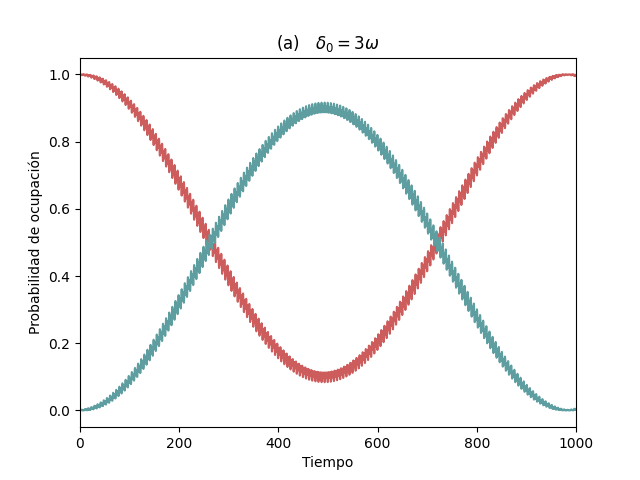

In [8]:
fig, ax = plt.subplots()

ps = [pLs, pRs]

ax.plot(t, pLs, 'indianred')        
ax.plot(t, pRs, 'cadetblue')
ax.set_xlim(0,1000)
ax.set_ylim()

plt.title('(a)   'r'$\delta_0=3\omega$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Probabilidad de ocupación')
plt.savefig('./figs/d_nresonant_TLS.pdf')


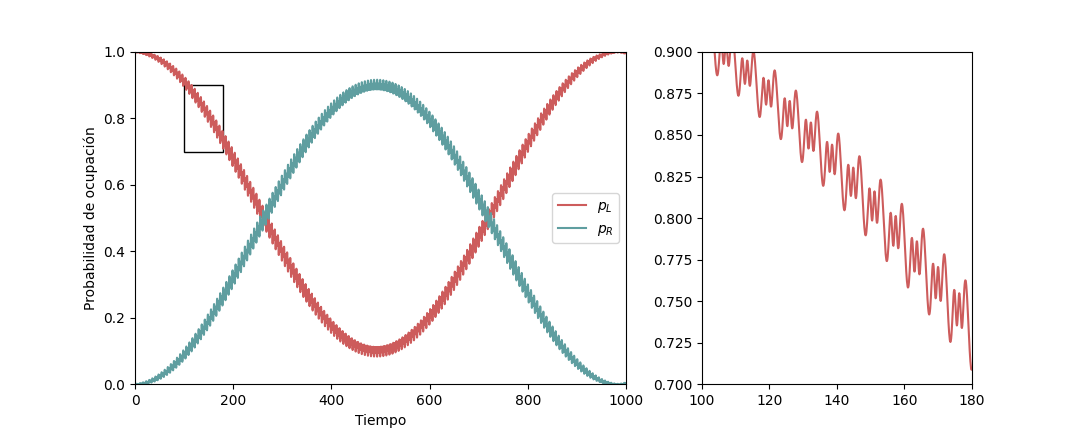

In [9]:
fact = 1.2
fig, axs = plt.subplots(1, 2, figsize=(9*fact, 3.6*fact), gridspec_kw={'width_ratios': [1, 0.55]})
colors = ['indianred', 'cadetblue']
# Figura (a)
ps = [pLs, pRs]

axs[0].plot(t, pLs, 'indianred')        
axs[0].plot(t, pRs, 'cadetblue')
axs[0].set_xlim(0,1000)
axs[0].set_ylim(0,1)

axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Probabilidad de ocupación')
axs[0].legend([r'$p_L$', r'$p_R$'])

#Figura (b)
axs[1].plot(t, pLs, 'indianred')        
axs[1].plot(t, pRs, 'cadetblue')
axs[1].set_xlim(100,180)
axs[1].set_ylim(0.7,0.9)

from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.patches import Circle


codes1 = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices1 = [(100, 0.7), (100, 0.9), (180, 0.9), (180, 0.7), (0, 0)]
path1 = Path(vertices1, codes1)
pathpatch1 = PathPatch(path1, facecolor= 'w', edgecolor='k')
axs[0].add_patch(pathpatch1)

plt.savefig('./figs/rwa.pdf')